# Load ApRES dat files from google bucket
This tests out some modifications to the ApRES scripts (the Nicholls scripts which allow them to load data from a google bucket using gcsfs.

In [54]:
import sys
sys.path.append("../../phase-sensitive-radar-processing/code/ApRES_Python_Nicholls_2021")
import fsspec
import os
import gcsfs
import ApRESDefs
import importlib
importlib.reload(ApRESDefs)
import xarray as xr
import matplotlib.pyplot as plt


## Find remote files
Get a list of the DAT files in the google bucket.

In [74]:
fs = gcsfs.GCSFileSystem(project='ldeo-glaciology', mode='ab', cache_timeout = 0)
gcs = 'gs://ldeo-glaciology/'
apres_dir = 'GL_apres_2022'
unit = "A101"
pattern = os.path.join(gcs, apres_dir,unit)
dats = fs.glob(pattern + "/**/*.DAT", recursive = True)
print(f"Total of {len(dats)} ApRES files.\n")

Total of 45 ApRES files.



# Remote load
Load one of the DAT files stored in the google bucket, to test the new capabilities.

In [92]:
datafile = fs.open(dats[0], mode = 'rb')
dat = ApRESDefs.DataFileObject(datafile)
B = dat.ExtractBurst(1)  
C = B.ExtractChirp([6])   # the numbering system I have used here extends the burst numbering system above.

In [93]:
C.Header["Time stamp"]

'2022-05-22 19:54:54'

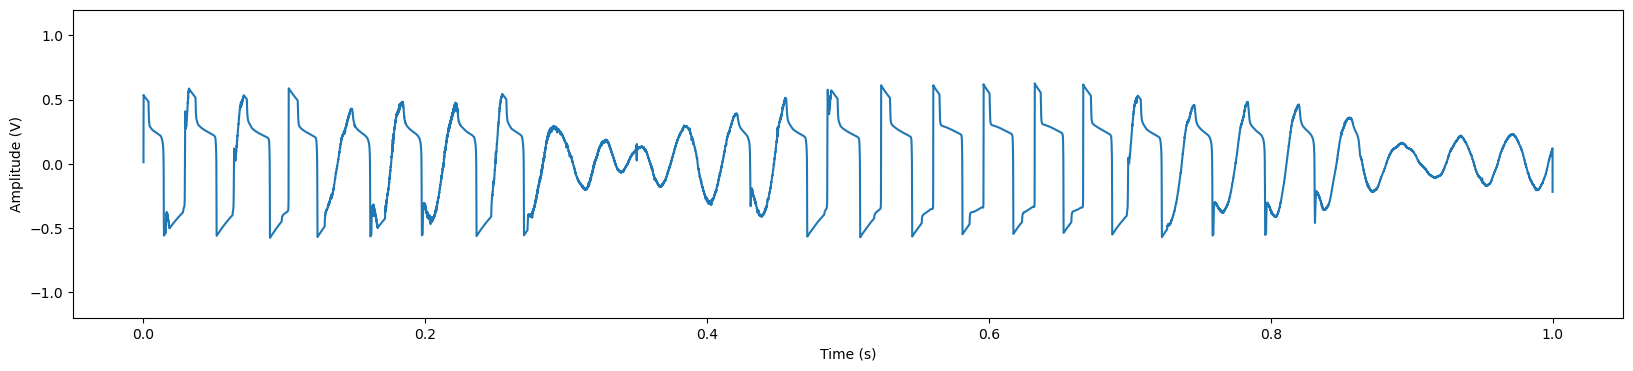

In [94]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(C.t, C.vdat, )
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude (V)")
ax.set_ylim([-1.2,1.2]);

# Local load
Load a DAT file from the local file strucutre to test that that still works as intended. 


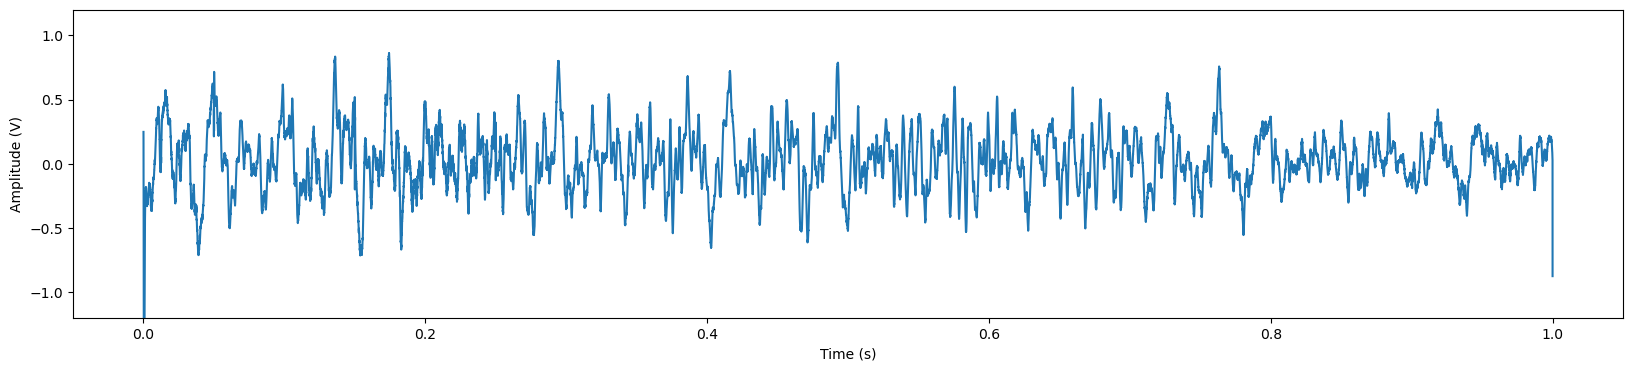

In [95]:
dat2 = ApRESDefs.DataFileObject('/home/jovyan/local_apres_data/DATA2022-05-26-1536.DAT')
B2 = dat2.ExtractBurst(0)  
C2 = B2.ExtractChirp([0])   # the numbering system I have used here extends the burst numbering system above.

fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(C2.t, C2.vdat, )
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude (V)")
ax.set_ylim([-1.2,1.2]);

In [96]:
C2.Header["Time stamp"]

'2022-05-26 15:37:02'

In [104]:
print(C.Header["Latitude"])
C2.Header["Latitude"]


69.2175


68.7101